In [1]:
import numpy as np
import pandas as pd

from pandas import read_csv

from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
from IPython.core.display import HTML



import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import decomposition
from sklearn.decomposition import pca
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB

from sklearn.cluster import KMeans

import scipy

from scipy.stats.stats import spearmanr
from scipy.stats import chi2_contingency

%matplotlib inline

In [2]:
df = pd.read_csv('bank-full.csv', delimiter = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
labelencoder = LabelEncoder()
df['y'] = labelencoder.fit_transform(df['y'])

df_1 = pd.DataFrame()
df_2 = pd.DataFrame()
df_2 = df['y']
df_1 = df.drop(['y'], axis =1)
# Get dummies variables
data_dummies = pd.get_dummies(df_1)
merged = pd.concat([data_dummies, df_2], axis = "columns")

# Avoid dummy trap

merged = merged.drop(['poutcome_unknown', 'contact_unknown', 'month_may', 'housing_yes',  'education_tertiary', 
             'default_no', 'loan_yes', 'marital_single','job_admin.'], axis =1)
merged.head()


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,y
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Separating out the target

y = merged.iloc[:,-1].values

# Separating out the features

X = merged.iloc[:,:42].values

In [6]:
# Resampling the minority to have the same number of sample with majority with synthetic resampling with KNN
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X, y = smote.fit_sample(X, y)

ModuleNotFoundError: No module named 'imblearn'

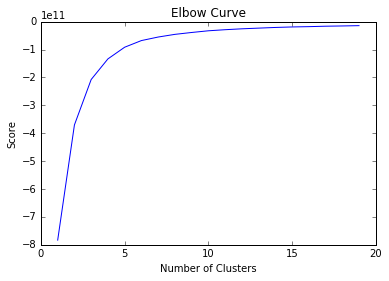

'implying that addition of more clusters do not explain much more of the variance in our relevant variable'

In [7]:
'Elbow method to determine number of clusters'
Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i, random_state= 5) for i in Nc]

kmeans

score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()
'from the plot, you can see that it levels off rapidly after 5 clusters:'
'implying that addition of more clusters do not explain much more of the variance in our relevant variable'

In [1]:
# Standardizing the features
X = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)


principalComponents = pca.fit_transform(X)



NameError: name 'StandardScaler' is not defined

In [13]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [14]:
principalDf.tail()


,principal component 1,principal component 2
45206,-0.111765,0.312402
45207,-0.773952,3.631536
45208,1.728291,3.964485
45209,-1.319930,1.343809
45210,4.061539,0.812801


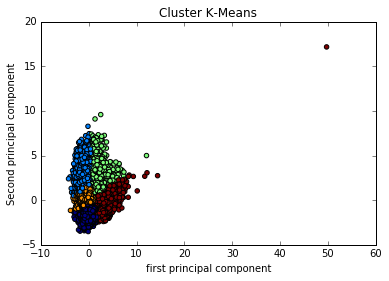

In [16]:
finalDf = pd.concat([principalDf, df[['y']]], axis = 1)
x = principalDf.iloc[:,0].values
x1 = principalDf.iloc[:,1].values




kmeans=KMeans(n_clusters=5)

kmeansoutput=kmeans.fit(principalComponents)

kmeansoutput

plt.figure('Cluster K-Means')

plt.scatter(x, x1, c=kmeansoutput.labels_)

plt.xlabel('first principal component')

plt.ylabel('Second principal component')

plt.title('Cluster K-Means')

plt.show()



In [24]:
principalDf['cluster'] = kmeans.fit_predict(X)
principalDf
combinedDf = pd.concat([df_1, principalDf], axis = "columns")
combinedDf = pd.concat([combinedDf, df['y']], axis = "columns")

combinedDf.shape

(45211, 20)

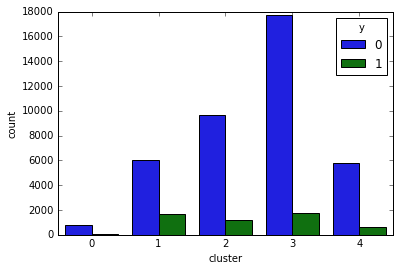

In [25]:
ax = sns.countplot(x="cluster", hue="y", data=combinedDf) 


In [31]:
# Create variable if cluster is 4
clusters = combinedDf['cluster'] == 1

# Create variable if deposit is 1
despo = combinedDf['y'] == 1

# Select all cases where cluster is 4 and deposit is yes
df_3 = pd.DataFrame()
df_3 = combinedDf[clusters & despo]

df_3


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,principal component 1,principal component 2,cluster,y
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1.840492,0.776479,1,1
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,2.040329,0.834738,1,1
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,2.017283,2.420673,1,1
24080,56,technician,married,secondary,no,589,yes,no,unknown,23,oct,518,1,147,2,success,1.613434,1.335678,1,1
24160,34,admin.,married,tertiary,no,899,yes,no,unknown,12,nov,114,1,170,3,failure,2.317512,0.523278,1,1
24425,49,services,married,secondary,no,202,yes,no,cellular,17,nov,651,2,104,1,failure,2.207353,-0.595658,1,1
24622,53,retired,married,tertiary,no,2269,no,no,cellular,17,nov,1091,2,150,1,success,1.411300,3.622762,1,1
24699,37,technician,married,secondary,no,5115,yes,no,cellular,17,nov,1210,2,171,4,failure,3.324811,-0.493751,1,1
24709,45,entrepreneur,married,secondary,no,781,no,yes,cellular,17,nov,652,2,126,2,failure,2.128152,0.122682,1,1
24922,34,management,single,tertiary,no,1494,yes,no,cellular,18,nov,596,1,182,1,other,2.896211,0.118429,1,1


In [322]:

'Note: The population is more alike except for the duration,'
'the average duration of those that say yes is significantly higher to the nay sayers'
'Those with a management job or retired with a bit more balance, campaign and duration are more likely to subscribe to term deposit'
print('Mean campaign:',df_3['campaign'].mean())
print('Mean Balance:',df_3['balance'].mean())

print('Mean Duration:',df_3['duration'].mean())
print('Std Duration:',df_3['duration'].std())
print('Std Duration:',df_3['balance'].std())

('Mean campaign:', 2.486842105263158)
('Mean Balance:', 1775.6859267734553)
('Mean Duration:', 236.30320366132725)
('Std Duration:', 222.66786057194759)
('Std Duration:', 3753.9971349438265)


In [111]:
kmeans.cluster_centers_

array([[-0.47213759,  1.67683432],
       [-0.4324989 , -2.23485691],
       [ 2.41907073, -1.34742688],
       [ 1.82835401,  1.18088951],
       [-1.33406907,  0.07642672]])

In [114]:
kmeans.labels_

array([3, 1, 4, ..., 0, 0, 4], dtype=int32)